# IBM Applied Science Capstone Project  

## “Which City to Settle in Collin County, Texas”

#### Objective: Explore what each city in Collin county offers using Foursquare location data and k-mean clustering algorithm, help people to evaluate which city to settle while relocating to Collin county   
#### Project Report Link: 

### Import related Python libraries and load data into data frame

In [1]:
import os
cwd = os.getcwd()


'/home/dsxuser/work'

In [10]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_cfbffa36bf7244f182a0f378100a82f9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Mr_d09bzzrj_l_1NaTpMK9YLF5d5hHpUOvYP6840t7pF',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cfbffa36bf7244f182a0f378100a82f9.get_object(Bucket='dscapstoneprojects-donotdelete-pr-pb2ycxvw21py4j',Key='city_zip.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tx_city_zip_df = pd.read_csv(body)
tx_city_zip_df.head()



,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,88555,El Paso,TX,31.694842,-106.299987,-7,1,"31.694842, -106.299987"
1,88573,El Paso,TX,31.694842,-106.299987,-7,1,"31.694842, -106.299987"
2,88574,El Paso,TX,31.694842,-106.299987,-7,1,"31.694842, -106.299987"
3,88578,El Paso,TX,31.694842,-106.299987,-7,1,"31.694842, -106.299987"
4,78133,Canyon Lake,TX,29.883884,-98.252190,-6,1,"29.883884, -98.25219"


In [11]:
tx_city_zip_df[['Zip','Latitude', 'Longitude', 'State']].head()


,Zip,Latitude,Longitude,State
0,88555,31.694842,-106.299987,TX
1,88573,31.694842,-106.299987,TX
2,88574,31.694842,-106.299987,TX
3,88578,31.694842,-106.299987,TX
4,78133,29.883884,-98.252190,TX


In [12]:
tx_city_zip_df.shape

(2743, 8)

In [13]:

body = client_cfbffa36bf7244f182a0f378100a82f9.get_object(Bucket='dscapstoneprojects-donotdelete-pr-pb2ycxvw21py4j',Key='city_list.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

city_list_df = pd.read_csv(body)
city_list_df.head()



,County,Zip Code,City
0,collin,75002,Allen
1,collin,75009,Celina
2,collin,75013,Allen
3,collin,75023,Plano
4,collin,75024,Plano


In [14]:
city_list_df.rename(columns={'Zip Code':'Zip'}, inplace=True)

city_list_df.head()

,County,Zip,City
0,collin,75002,Allen
1,collin,75009,Celina
2,collin,75013,Allen
3,collin,75023,Plano
4,collin,75024,Plano


In [15]:
#merge postal with latitude and longtitude 
candidate_areaa_df = pd.merge(city_list_df,
                 tx_city_zip_df[['Zip','Latitude', 'Longitude', 'State']],
                 on='Zip')
candidate_areaa_df.head()

,County,Zip,City,Latitude,Longitude,State
0,collin,75002,Allen,33.092846,-96.62447,TX
1,collin,75009,Celina,33.327927,-96.76129,TX
2,collin,75013,Allen,33.106582,-96.69402,TX
3,collin,75023,Plano,33.054671,-96.73506,TX
4,collin,75024,Plano,33.077070,-96.79859,TX


In [16]:
type(candidate_areaa_df)

pandas.core.frame.DataFrame

In [17]:
candidate_areaa_df.shape

(128, 6)

### Prepare dataframe for Collin County 

In [18]:
#trim leading and trailing space in column County 
candidate_areaa_df['County'] = candidate_areaa_df['County'].str.strip()

collin_df = candidate_areaa_df[candidate_areaa_df.County == 'collin']
tarrant_df= candidate_areaa_df[candidate_areaa_df.County == 'Tarrant']
collin_df.head()

,County,Zip,City,Latitude,Longitude,State
0,collin,75002,Allen,33.092846,-96.62447,TX
1,collin,75009,Celina,33.327927,-96.76129,TX
2,collin,75013,Allen,33.106582,-96.69402,TX
3,collin,75023,Plano,33.054671,-96.73506,TX
4,collin,75024,Plano,33.077070,-96.79859,TX


In [19]:
city_list = collin_df['City'].unique().tolist()

In [20]:
len(city_list)
city_list


['Allen',
 'Celina',
 'Plano',
 'Frisco',
 'Mckinney',
 'Prosper',
 'Weston',
 'Wylie',
 'Copeville',
 'Josephine',
 'Lavon',
 'Nevada',
 'Dallas',
 'Princeton',
 'Anna',
 'Blue Ridge',
 'Farmersville',
 'Melissa',
 'Westminster',
 'Sam Norwood',
 'Wellington']

In [21]:
# Tarrant county is an candidate for future analysis 
#tarrant_df.head()

### Visualize Collin cities on map 

In [22]:
c_uzip=str(collin_df['Zip'].nunique())
t_uzip=str(tarrant_df['Zip'].nunique())
#c_uzip

print('totoal unique zip code/neighborhood in collin county is: '+ c_uzip)
print('totoal unique zip code/neighborhood in tarrant county is: '+ t_uzip)

totoal unique zip code/neighborhood in collin county is: 33
totoal unique zip code/neighborhood in tarrant county is: 95


In [23]:

# load all necessary libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

#### Get collin county geo coordinator 

In [24]:
address = 'Collin County, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Collin Country are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Collin Country are 33.00022645, -96.7761219388265.


#### Collin County map with All cities within 

In [25]:
map_collin = folium.Map(location=[latitude, longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(collin_df['Latitude'], collin_df['Longitude'], collin_df['City'], collin_df['Zip']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_collin)  
    
map_collin


#### Define Foursquare Credential 

In [26]:
# @hidden_cell 
CLIENT_ID = 'XMMYFV0UONLPKIOHN0EHLU0P2EHRNOG321U0XCC04BHWHZCR' 
CLIENT_SECRET = 'DD0QDLZLX0CIETGQBLFOTVX5HVFR1DJUHYXGYMVOGGEBIDK4' 

In [27]:
VERSION = '20180605' # Foursquare API version

### Use Foursquare API explore collin county city venues 

In [28]:
from pandas.io.json import json_normalize
#Define number of venues, and radius range
LIMIT =  100
radius = 2000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url 


'https://api.foursquare.com/v2/venues/explore?&client_id=XMMYFV0UONLPKIOHN0EHLU0P2EHRNOG321U0XCC04BHWHZCR&client_secret=DD0QDLZLX0CIETGQBLFOTVX5HVFR1DJUHYXGYMVOGGEBIDK4&v=20180605&ll=34.858194,-100.20763000000001&radius=2000&limit=100'

In [29]:
import requests
results = requests.get(url).json()
results 

{'meta': {'code': 200, 'requestId': '5ce825e94c1f6753b320658b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4c55cd7472cf0f47049cdad6-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16e941735',
         'name': 'Fast Food Restaurant',
         'pluralName': 'Fast Food Restaurants',
         'primary': True,
         'shortName': 'Fast Food'}],
       'id': '4c55cd7472cf0f47049cdad6',
       'location': {'address': '1010 Houston St',
        'cc': 'US',
        'city': 'Wellington',
        'country': 'United States',
        'distance': 585,
        'formattedAddress': ['1010 Houston St',
         'Wellington, TX 79095',
         'United States'],
        'labeledLatLngs': [{'label': 'displa

#### Get veunue list for all the citys within collin county

In [30]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(collin_df['Latitude'], collin_df['Longitude'], collin_df['City']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [31]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['City', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1265, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Allen,33.092846,-96.62447,Starbucks,33.085953,-96.619442,Coffee Shop
1,Allen,33.092846,-96.62447,SONIC Drive In,33.086214,-96.622456,Fast Food Restaurant
2,Allen,33.092846,-96.62447,Walmart Supercenter,33.088311,-96.618509,Big Box Store
3,Allen,33.092846,-96.62447,7-Eleven,33.099590,-96.628009,Convenience Store
4,Allen,33.092846,-96.62447,Celebration Park,33.107432,-96.624155,Park


In [32]:
# Get an overview on total venues in each city 
venue_count=(venues_df.groupby(["City"]).count()).sort_values(['VenueCategory'], ascending=False)

venue_count


,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
City,,,,,,
Plano,579,579,579,579,579,579
Mckinney,182,182,182,182,182,182
Dallas,180,180,180,180,180,180
Allen,131,131,131,131,131,131
Wylie,51,51,51,51,51,51
Frisco,33,33,33,33,33,33
Prosper,31,31,31,31,31,31
Melissa,19,19,19,19,19,19
Lavon,11,11,11,11,11,11


In [33]:
venue_plot_df=venue_count.loc[:,['VenueCategory']]

Matplotlib version:  2.1.0


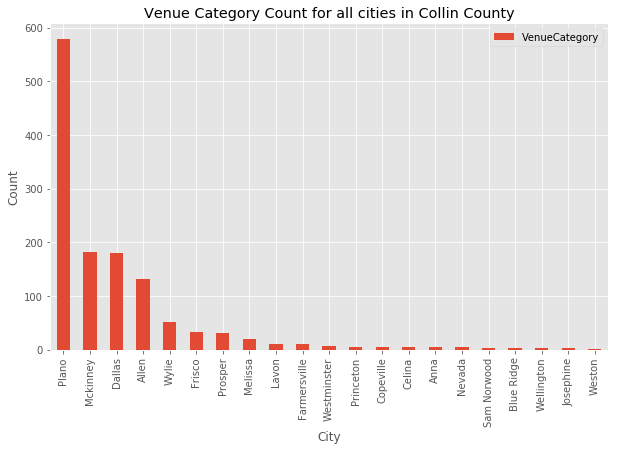

In [34]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


# step 2: plot data
venue_plot_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Venue Category Count for all cities in Collin County') # add title to the plot

plt.show()

### Explore what kind of venues in each city 

In [35]:
print('There are {} uniques categories in collin county.'.format(len(venues_df['VenueCategory'].unique())))

There are 195 uniques categories in collin county.


#### Create new dataframe that has city and venues as columns

In [36]:
# one hot encoding
collin_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
collin_onehot['City'] = venues_df['City'] 

# move neighborhood column to the first column
fixed_columns = [collin_onehot.columns[-1]] + list(collin_onehot.columns[:-1])
collin_onehot = collin_onehot[fixed_columns]

print(collin_onehot.shape)
collin_onehot.head()



(1265, 196)


,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Big Box Store,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Event Service,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Lawyer,Lighting Store,Liquor Store,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Nail Salon,New American Restaurant,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Pool,Pub,Racetrack,Record Shop,Rental Car Location,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Travel & Transport,Turkish Restaurant,Udon Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Allen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Allen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Allen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Group rows by neighborhood and by mean of the frequency of each category

In [37]:

collin_grouped = collin_onehot.groupby('City').mean().reset_index()
collin_grouped

,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Big Box Store,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Event Service,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Lawyer,Lighting Store,Liquor Store,Malay Restaurant,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Nail Salon,New American Restaurant,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Pool,Pub,Racetrack,Record Shop,Rental Car Location,Rental Service,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Travel & Transport,Turkish Restaurant,Udon Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Allen,0.000000,0.000000,0.000000,0.007634,0.000000,0.015267,0.000000,0.000000,0.007634,0.000000,0.007634,0.007634,0.000000,0.000000,0.015267,0.038168,0.000000,0.022901,0.007634,0.000000,0.015267,0.000000,0.000000,0.000000,0.000000,0.000000,0.007634,0.000000,0.000000,0.030534,0.000000,0.007634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007634,0.007634,0.038168,0.000000,0.000000,0.030534,0.007634,0.000000,0.000000,0.007634,0.000000,0.007634,0.000000,0.000000,0.00,0.000000,0.007634,0.007634,0.000000,0.00,0.007634,0.0,0.000000,0.068702,0.000000,0.000000,0.000000,0.000000,0.000000,0.007634,0.007634,0.007634,0.000000,0.007634,0.007634,0.000000,0.000000,0.015267,0.000000,0.000000,0.007634,0.007634,0.000000,0.000000,0.007634,0.022901,0.022901,0.000000,0.015267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015267,0.007634,0.007634,0.000000,0.015267,0.000000,0.007634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007634,0.007634,0.000000,0.007634,0.007634,0.000000,0.000000,0.000000,0.000000,0.038168,0.000000,0.000000,0.007634,0.000000,0.015267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.015267,0.022901,0.0

In [38]:
collin_grouped.shape

(21, 196)

#### Get top 10 venues of each city

In [39]:
#List top 10 venues of each city based on the vaue of frequency mean 
num_top_venues = 10

for hood in collin_grouped['City']:
    print("----"+hood+"----")
    temp = collin_grouped[collin_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allen----
                  venue  freq
0  Fast Food Restaurant  0.07
1    Mexican Restaurant  0.04
2           Coffee Shop  0.04
3           Pizza Place  0.04
4                  Bank  0.04
5     Convenience Store  0.03
6          Burger Joint  0.03
7              Pharmacy  0.03
8        Baseball Field  0.02
9                 Hotel  0.02


----Anna----
                           venue  freq
0                   Antique Shop  0.25
1             Italian Restaurant  0.25
2              Other Repair Shop  0.25
3                  Event Service  0.25
4              Accessories Store  0.00
5                       Pie Shop  0.00
6                         Office  0.00
7                   Optical Shop  0.00
8           Other Great Outdoors  0.00
9  Paper / Office Supplies Store  0.00


----Blue Ridge----
                           venue  freq
0               Football Stadium   0.5
1                 Clothing Store   0.5
2              Accessories Store   0.0
3                       Pharmacy   

In [40]:
#define funtion to sort the venues in descending order 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
#create the new dataframe and display the top 10 venues for each city.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = collin_grouped['City']

for ind in np.arange(collin_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(collin_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allen,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
1,Anna,Antique Shop,Italian Restaurant,Event Service,Other Repair Shop,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck
2,Blue Ridge,Football Stadium,Clothing Store,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flower Shop,Flea Market
3,Celina,Trail,Discount Store,Pharmacy,Café,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
4,Copeville,Construction & Landscaping,Racetrack,Video Store,Yoga Studio,Farm,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop


In [49]:
city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allen,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
1,Anna,Antique Shop,Italian Restaurant,Event Service,Other Repair Shop,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck
2,Blue Ridge,Football Stadium,Clothing Store,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flower Shop,Flea Market
3,Celina,Trail,Discount Store,Pharmacy,Café,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
4,Copeville,Construction & Landscaping,Racetrack,Video Store,Yoga Studio,Farm,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
5,Dallas,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Convenience Store,Sushi Restaurant,Coffee Shop,American Restaurant,Seafood Restaurant,Thai Restaurant,Chinese Restaurant
6,Farmersville,Discount Store,Restaurant,Fast Food Restaurant,Mexican Restaurant,Gas Station,Café,Chinese Restaurant,American Restaurant,Diner,Donut Shop
7,Frisco,Video Store,Pizza Place,Football Stadium,Donut Shop,Convenience Store,Sandwich Place,Juice Bar,Flower Shop,Mobile Phone Shop,Pool
8,Josephine,Gas Station,Park,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
9,Lavon,Mexican Restaurant,Discount Store,Donut Shop,BBQ Joint,Gas Station,Auto Garage,Convenience Store,Sandwich Place,Intersection,Fast Food Restaurant


In [50]:
#Reindex and use city as index of the data frame 
indtest_df=city_venues_sorted

indtest_df=indtest_df.set_index(['City'])

#data.set_index(["First Name"])
indtest_df

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
City,,,,,,,,,,
Allen,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
Anna,Antique Shop,Italian Restaurant,Event Service,Other Repair Shop,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck
Blue Ridge,Football Stadium,Clothing Store,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flower Shop,Flea Market
Celina,Trail,Discount Store,Pharmacy,Café,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
Copeville,Construction & Landscaping,Racetrack,Video Store,Yoga Studio,Farm,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
Dallas,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Convenience Store,Sushi Restaurant,Coffee Shop,American Restaurant,Seafood Restaurant,Thai Restaurant,Chinese Restaurant
Farmersville,Discount Store,Restaurant,Fast Food Restaurant,Mexican Restaurant,Gas Station,Café,Chinese Restaurant,American Restaurant,Diner,Donut Shop
Frisco,Video Store,Pizza Place,Football Stadium,Donut Shop,Convenience Store,Sandwich Place,Juice Bar,Flower Shop,Mobile Phone Shop,Pool
Josephine,Gas Station,Park,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop


#### Check the best K for clustering 

In [69]:
#Select reasonable K to reduce clustering error  

 
for k in range (1, 11):
 
    # random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(collin_clustering)

    # These are our fitted labels for clusters 
    labels = kmeans_model.labels_
 
    # Sum of distances of city to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
 
print ("")

k: 1  cost: 4.06065508561
k: 2  cost: 3.11637570577
k: 3  cost: 2.65411697461
k: 4  cost: 2.33888702865
k: 5  cost: 2.04154492781
k: 6  cost: 1.77517340135
k: 7  cost: 1.50308337468
k: 8  cost: 1.22812457121
k: 9  cost: 0.983323601626
k: 10  cost: 0.753267143108



In [77]:
# A Silhouette coefficient is calculated for observation, which is then averaged to determine the Silhouette score. 
# This coefficient essentially measures how close an observation is to neighboring clusters, which is desired to be max 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Use silhouette score to find optimal number of clusters to segment the data
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(collin_clustering)
    predictions = model.predict(collin_clustering)
    results[size] = silhouette_score(collin_clustering, predictions)

best_size = max(results, key=results.get)

best_size

2

In [51]:
# based on error cost and another method of estimating, choose 4 clusters  
collin_clusters = 4

collin_clustering = collin_grouped.drop(["City"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=collin_clusters, random_state=0).fit(collin_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each city. 

# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

collin_merged = collin_df


collin_merged= collin_merged.join(city_venues_sorted.set_index('City'), on='City')

collin_merged.head() 

,County,Zip,City,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,collin,75002,Allen,33.092846,-96.62447,TX,0,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
1,collin,75009,Celina,33.327927,-96.76129,TX,0,Trail,Discount Store,Pharmacy,Café,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
2,collin,75013,Allen,33.106582,-96.69402,TX,0,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
3,collin,75023,Plano,33.054671,-96.73506,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store
4,collin,75024,Plano,33.077070,-96.79859,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store


In [53]:
#drop rows with null value and convert cluster label to int
collin_merged=collin_merged.dropna()

collin_merged['Cluster Labels'] = collin_merged['Cluster Labels'].astype(int)

In [54]:
collin_merged['Cluster Labels'].unique()

array([0, 1, 3, 2])

### Visualize the clustered cities on map 

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(collin_clusters)
ys = [i + x + (i*x)**2 for i in range(collin_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(collin_merged['Latitude'], collin_merged['Longitude'], collin_merged['City'], collin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Exam Clusters

### Cluster 1

In [56]:
collin_merged.loc[collin_merged['Cluster Labels'] == 0, collin_merged.columns[[2] + list(range(5, collin_merged.shape[1]))]]

,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allen,TX,0,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
1,Celina,TX,0,Trail,Discount Store,Pharmacy,Café,Farmers Market,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop
2,Allen,TX,0,Fast Food Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bank,Pharmacy,Burger Joint,Convenience Store,Thai Restaurant,Sandwich Place
3,Plano,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store
4,Plano,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store
5,Plano,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store
6,Plano,TX,0,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,American Restaurant,Park,Pharmacy,Burger Joint,Convenience Store
7,Frisco,TX,0,Video Store,Pizza Place,Football Stadium,Donut Shop,Convenience Store,Sandwich Place,Juice Bar,Flower Shop,Mobile Phone Shop,Pool
8,Mckinney,TX,0,Pizza Place,American Restaurant,Sandwich Place,Mexican Restaurant,Convenience Store,Café,Burger Joint,Fried Chicken Joint,Fast Food Restaurant,Discount Store
9,Mckinney,TX,0,Pizza Place,American Restaurant,Sandwich Place,Mexican Restaurant,Convenience Store,Café,Burger Joint,Fried Chicken Joint,Fast Food Restaurant,Discount Store


### Cluster 2

In [57]:
collin_merged.loc[collin_merged['Cluster Labels'] == 1, collin_merged.columns[[2] + list(range(5, collin_merged.shape[1]))]]

,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Weston,TX,1,American Restaurant,Yoga Studio,Farmers Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop


### Cluster 3

In [58]:
collin_merged.loc[collin_merged['Cluster Labels'] == 2, collin_merged.columns[[2] + list(range(5, collin_merged.shape[1]))]]

,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Sam Norwood,TX,2,Fast Food Restaurant,Diner,Motel,Yoga Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Court
32,Wellington,TX,2,Fast Food Restaurant,Diner,Yoga Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Football Stadium,Food Truck,Food Court,Flower Shop


### Cluster 4

In [59]:
collin_merged.loc[collin_merged['Cluster Labels'] == 3, collin_merged.columns[[2] + list(range(5, collin_merged.shape[1]))]]

,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Blue Ridge,TX,3,Football Stadium,Clothing Store,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flower Shop,Flea Market


####   Cities in cluster 1 include those around the central area and have lot of options for dinning, shopping, sports and pharmacies. Cities in cluster 2, 3, 4 are those that locate around the boarder of the county, comparatively have less number of venues but offers sports facilities and easy access to resources. Cluster 2, 3, 4 are can be clustered together, like the best K analysis conducted before running clustering algorithm.